# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
# Create two new dataframe from your CSV
NorthCallCenter_df = pd.read_csv('NorthCallCenter.csv')
SouthCallCenter_df = pd.read_csv('SouthCallCenter.csv')


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here
NorthCallCenter_df['Rep ID'].value_counts()
NorthCallCenter_df['Rep ID'].value_counts().count()


9

There are 9 reps in NorthCallCenter dataframe

In [3]:
SouthCallCenter_df['Rep ID'].value_counts().count()


11

There are 11 reps in NorthCallCenter dataframe

In [4]:
NCC_busyMinutes = NorthCallCenter_df['Busy Minutes'].sum()/len(NorthCallCenter_df)
NCC_NotReadyMinutes = NorthCallCenter_df['Not Ready Minutes'].sum()/len(NorthCallCenter_df)
NCC_IncomingWaitTime = NorthCallCenter_df['Incoming Wait Time'].sum()/len(NorthCallCenter_df)
NCC_DuringCallWaitTime = NorthCallCenter_df['During Call Wait Time'].sum()/len(NorthCallCenter_df)
print(f"For NorthCallCenter, Average busy minutes is {NCC_busyMinutes} , Average not ready minutes is {NCC_NotReadyMinutes} , Average incoming wait time is {NCC_IncomingWaitTime},Average during call wait time is {NCC_DuringCallWaitTime}")


For NorthCallCenter, Average busy minutes is 9.987755102040817 , Average not ready minutes is 1.9142857142857144 , Average incoming wait time is 1.0204081632653061,Average during call wait time is 2.9673469387755103


In [5]:
SCC_busyMinutes = SouthCallCenter_df['Busy Minutes'].sum()/len(SouthCallCenter_df)
SCC_NotReadyMinutes = SouthCallCenter_df['Not Ready Minutes'].sum()/len(SouthCallCenter_df)
SCC_IncomingWaitTime = SouthCallCenter_df['Incoming Wait Time'].sum()/len(SouthCallCenter_df)
SCC_DuringCallWaitTime = SouthCallCenter_df['During Call Wait Time'].sum()/len(SouthCallCenter_df)
print(f"For NorthCallCenter, Average busy minutes is {SCC_busyMinutes} , Average not ready minutes is {SCC_NotReadyMinutes} , Average incoming wait time is {SCC_IncomingWaitTime},Average during call wait time is {SCC_DuringCallWaitTime}")


For NorthCallCenter, Average busy minutes is 10.054140127388536 , Average not ready minutes is 1.910828025477707 , Average incoming wait time is 1.2038216560509554,Average during call wait time is 3.0764331210191083


In [6]:
#3. What is the number of calls taken for each time block?
NorthCallCenter_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
5:00 PM     17
1:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [7]:
#3. What is the number of calls taken for each time block?
SouthCallCenter_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [8]:
#1.Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

Outgoing = NorthCallCenter_df.loc[NorthCallCenter_df['Incoming or Outgoing'] == 'Outgoing'] # This creates a dataframe Outgoing
#which has "Incoming or Outgoing" column as Outgoing and filters rest of the columns with the value as incoming 
print(Outgoing.shape)
IncomingWaitTime_null_df = Outgoing[Outgoing['Incoming Wait Time'].isnull()] # This code checks the value of "Incoming Wait Time" column
#in above created dataset
print(IncomingWaitTime_null_df.shape)


(163, 15)
(163, 15)


When we print shape we get to know Outgoing dataframe has 163 rows and the IncomingWaitTime_null_df also has 163 rows , 
hence confirming that all the 163 rows which have a value of Outgoing in "Incoming or Outgoing" column has a corresponding 
value of NULL in 'Incoming Wait Time'

In [9]:
# 2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
NorthCallCenter_df["Sale"].value_counts()

NO        234
YES        10
YES         1
Name: Sale, dtype: int64

In [10]:
# 2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
NorthCallCenter_df["Sale"] = NorthCallCenter_df["Sale"].str.strip()
NorthCallCenter_df["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

### In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
As per my Analysis , I could observe that one of the rows under SALES columns had YES appended with space and I corrected it by 
using strip() method to remove any rows with a space appended 

In [11]:
# 3. Are there duplicates in the two data sets? If there are, how did you handle them.?
NorthCallCenter_df
duplicate_north = NorthCallCenter_df[NorthCallCenter_df.duplicated()]
duplicate_south = SouthCallCenter_df[SouthCallCenter_df.duplicated()]
print(duplicate_south)
print(duplicate_north)
# There are no duplicate values in both the dataframes

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


In [12]:
# Clean your data here
#I don't think there is any unnecessary data to delete

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [13]:
# Manipulate data here
North_South_df = NorthCallCenter_df.append([SouthCallCenter_df])

#1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

North_South_df_grouped = North_South_df.groupby(['Branch','Rep ID']).sum()
North_South_df_grouped
repWithHighestCalls = North_South_df_grouped.groupby('Branch')['Calls'].idxmax()
print("Rep who has highest Numbers of calls in each branch are : " , repWithHighestCalls)

Rep who has highest Numbers of calls in each branch are :  Branch
North    (North, Brent)
South     (South, Eric)
Name: Calls, dtype: object


In [14]:
# 2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

average_abandonment_each_branch = North_South_df.groupby('Branch')['Abandoned'].mean()
print ("Average call abandonment rate for North branch is : {:.2%}".format(average_abandonment_each_branch.North))
print ("Average call abandonment rate for South branch is : {:.2%}".format(average_abandonment_each_branch.South))

average_abandonment_for_company = North_South_df['Abandoned'].mean()
print ("\nAverage call abandonment rate for the whole company is :" "{:.2%}".format(average_abandonment_for_company))



Average call abandonment rate for North branch is : 2.86%
Average call abandonment rate for South branch is : 1.27%

Average call abandonment rate for the whole company is :1.97%


### Average call abandonment KPI Analysis for North/South and entire company 
Abandoned rate is within the optimal range of 2 to 5 % for North branches i.e 2.85 percent, and for South branch Abandoned rate is
1.2 percent which means South branch has a much higher efficency with such a low abandonment rate

In [15]:
# 3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

NorthSouthdf_service_level = North_South_df.loc[North_South_df['Incoming Wait Time'] <= 2]
incoming_north = NorthCallCenter_df.loc[NorthCallCenter_df['Incoming or Outgoing'] == 'Incoming'] 
incoming_south = SouthCallCenter_df.loc[SouthCallCenter_df['Incoming or Outgoing'] == 'Incoming'] 


print ("Service Level for North is : {:.2%}".format(NorthSouthdf_service_level.groupby('Branch')['Incoming Wait Time'].count().North/len(incoming_north)))
print ("Service Level for South is : {:.2%}".format(NorthSouthdf_service_level.groupby('Branch')['Incoming Wait Time'].count().South/len(incoming_south)))


# Entire Company
incoming_calls_entire_company = North_South_df.loc[North_South_df['Incoming or Outgoing'] == 'Incoming'] 
print ("Service Level for Entire company is : {:.2%}".format(NorthSouthdf_service_level['Incoming Wait Time'].count()/len(incoming_calls_entire_company)))


Service Level for North is : 40.24%
Service Level for South is : 38.10%
Service Level for Entire company is : 38.94%


### Service Level KPI Analysis for North/South and entire company 
As per above 40 percent of calls are answered within 2 secs (I have included 2 secs also an ideal time frame) in North          branch and  38 percent of calls are answered in 2 secs in South branch. For the entire branch the approximately 38.9 percent of the calls are answered in 2 secs in South branch

In [16]:
# 4 For each branch and the entire company, what is the average speed of answer?
print ("average speed of answer for North Branch" , North_South_df.groupby('Branch')['Incoming Wait Time'].sum().North/len(incoming_north))
print ("average speed of answer for South Branch" ,North_South_df.groupby('Branch')['Incoming Wait Time'].sum().South/len(incoming_south))
#Hence Average speed of answer is almost similar for both the branch i.e about 3 seconds 
print ("average speed of answer for entire Branch" ,North_South_df['Incoming Wait Time'].sum()/len(incoming_calls_entire_company))

average speed of answer for North Branch 3.048780487804878
average speed of answer for South Branch 3.0
average speed of answer for entire Branch 3.019230769230769


### Average speed of answer KPI Analysis for North/South 
Average speed of answer is almost similar for both the branch i.e about 3 seconds

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

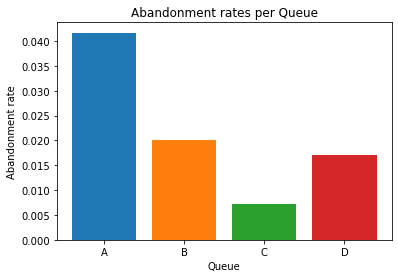

Index(['A', 'B'], dtype='object', name='Queue')
Index(['C', 'D'], dtype='object', name='Queue')


In [17]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
import seaborn as sns
import matplotlib.pyplot as plt
abandonment_rates = {}
queues = ["A", "B", "C", "D"]

#Combined data set
queue_dict = North_South_df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    plt.bar(queues[i], abandonment_rates[queues[i]])
plt.title("Abandonment rates per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment rate")
plt.show()

#North data set
queue_dict_north = NorthCallCenter_df.groupby("Queue").agg("sum")
queue_dict_south = SouthCallCenter_df.groupby("Queue").agg("sum")

print(queue_dict_north.index) # This shows North call centre has only 2 queues A and B
print(queue_dict_south.index) # This shows South call centre has only 2 queues C and D1


###  Average abandonment rate per queue
As per the above graph , the abandonment_rates is highest for Queue A and lowest for Queue C , i.e Queue C is
performing better than rest of the qeues

[]

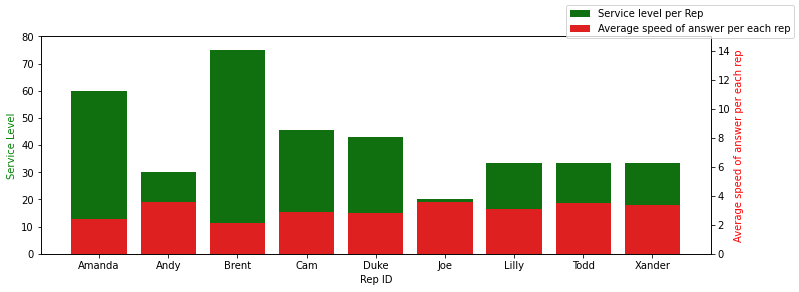

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create visualization 2 here (For North Call centre)
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = NorthCallCenter_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = NorthCallCenter_df[NorthCallCenter_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = NorthCallCenter_df[NorthCallCenter_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID") # [Aparna] so merge automatically renames the common column name as _x and _ y i.e Calls is automatically renamed to Calls_x and Calls_y 

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

fig,fig1 = plt.subplots(figsize=(12,4))

fig1 = sns.barplot(x = service_level.index, y = service_level["Service Level %"], color='green',label = "Service level per Rep")

fig2 = fig1.twinx()
fig2.set_ylim([0,15])
fig1.set_ylim([0,80])
fig2 = sns.barplot(x = north_plt["Rep ID"], y = north_plt["Incoming Wait Time"] , color='red', label = "Average speed of answer per each rep")

fig1.set_ylabel('Service Level', color = 'g')
fig2.set_ylabel('Average speed of answer per each rep' , color = 'r' )
fig1.set_xlabel('Rep ID')
fig.legend(loc='upper right')
fig1.plot()


###  Service Level Analsys

Above graph shows that Brent has a highest service level percentage of 75% which means of the total calls which brent 
answers to , he replied to 75% of those calls in less than or equal to 2 seconds which means Brent is efficient in picking
calls which signifies 75% of his customer doesn't have to wait for more than 2 seconds which helps in good customer service.
Joes is least efficient in replying to the calls , he answers to only 20% of his customers in less than 2 seconds which
signifies he makes 80% of the customers to wait for longer(more than 2 seconds) in call waiting

###  Average Speed of Answer Analsys
This plot shows Brent is efficient as his Incoming wait time is 2 which is lesser that any other Rep, hence he is answering 
to most of his customers in 2 seconds


[]

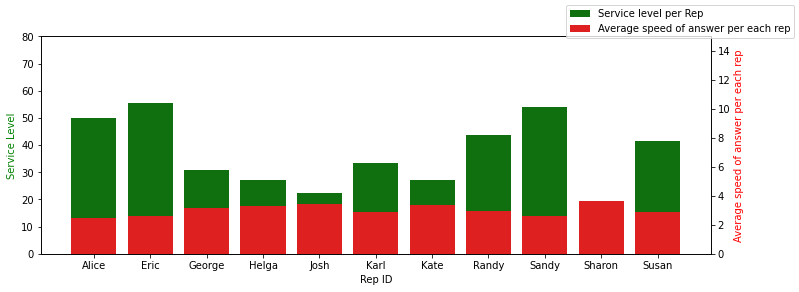

In [19]:
# Create visualization 2 here (For South Call centre)
# south_plt contains the data you need for the average speed of answer of each rep

south_plt = SouthCallCenter_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = SouthCallCenter_df[SouthCallCenter_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = SouthCallCenter_df[SouthCallCenter_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID") # [Aparna] so internally merge automatically 
#renames the common column name as _x and _ y i.e Calls is automatically renamed to Calls_x and Calls_y 

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

fig,fig1 = plt.subplots(figsize=(12,4))

fig1 = sns.barplot(x = service_level.index, y = service_level["Service Level %"], color='green',label = "Service level per Rep")

fig2 = fig1.twinx()
fig2.set_ylim([0,15])
fig1.set_ylim([0,80])
fig2 = sns.barplot(x = south_plt["Rep ID"], y = south_plt["Incoming Wait Time"] , color='red', label = "Average speed of answer per each rep")

fig1.set_ylabel('Service Level', color = 'g')
fig2.set_ylabel('Average speed of answer per each rep' , color = 'r' )
fig1.set_xlabel('Rep ID')
fig.legend(loc='upper right')
fig1.plot()



###  Service Level Analsys

Below shows that Brent has a highest service level percentage of 75% which means of the total calls which brent 
answere to , he replied to 75% of those calls in less than or equal to 2 seconds which means Brent is efficient in picking
calls which signifies 75% of his customer doesn't have to wait for more than 2 seconds which helps in good customer service.
Joes is least efficient in replying to the calls , he answers to only 20% of his customers in less than 2 seconds which
signifies he makes 80% of the customers to wait for longer(more than 2 seconds) in call waiting

###  Average Speed of Answer Analsys
This plot shows Brent is efficient as his Incoming wait time is 2 which is lesser that any other Rep, hence he is answering 
to most of his customers in 2 seconds




Text(0, 0.5, 'Count')

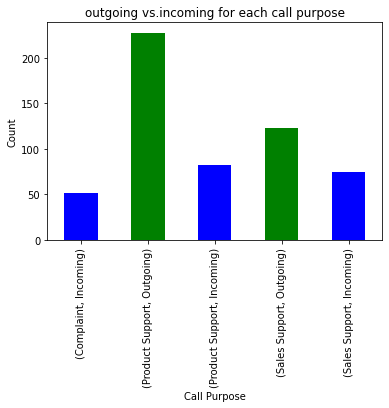

In [20]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = North_South_df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()


colors = ('b', 'g')
purpose_counts.plot(kind='bar', color = colors)
plt.title("outgoing vs.incoming for each call purpose")
plt.xlabel("Call Purpose")
plt.ylabel("Count")



### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

I have used bar charts in all the above 3 visualisations. The reason being , line chart or scatter plot would have been useful when we had to find trends in data however in all of the 3 charts we didn't need to find trends. Hence bar chart is appropriate represenation here.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

1 As per the stats and graphs
    average abandonment rate - South call center is performing more efficiently as it has lesser average abandonment rate
    service level - There is not a very huge difference between North and Soutch data set , average service level is approx
                    40% for North and 38% for South
    average speed of answer - There is not a very huge difference between North and Soutch data set , average speed of
                              answer is approx 3 seconds for both North and South
        
2. As per my opinion , North branch would be benifited from an extra help as more resources would mean less abandonment rate
3. Most of the necessary information is available , however I feel if the data set had information about the call being a New
   call or follow-up call. This will help us understand if there are multiple follow-up calls i.e customer is calling muliple      times for the same issue which would not be a good sign and we can work on improvements or trainings for reps for avoiding 
   multiple calls from a single customers.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

Text(0, 0.5, 'Count')

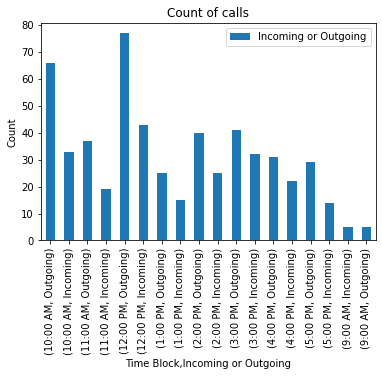

In [21]:
# Create your visualization here!
call_times = North_South_df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
count_calls_per_timeblock = call_times.groupby(["Time Block"])["Incoming or Outgoing"].value_counts()
count_calls_per_timeblock.plot.bar(legend=True)
plt.title("Count of calls")
plt.ylabel("Count")
# Use groupby and get_group to select which call purpose to plot:



In [22]:
type(count_calls_per_timeblock)

pandas.core.series.Series

## All the code below and onwards is my practice code , please ignore it

In [23]:
'''
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = North_South_df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
names = list(complaints.keys())
values = list(complaints.values())
plt.bar(range(len(complaints)), values, tick_label=names)
#plt.title("Complaints")
#plt.show()

names = list(sales_support.keys())
values = list(sales_support.values())
plt.bar(range(len(sales_support)), values, tick_label=names)
#plt.title("Sales Support")
#plt.show()

names = list(product_support.keys())
values = list(product_support.values())
plt.bar(range(len(product_support)), values, tick_label=names)
#plt.title("Product Support")
#plt.show()
'''



'\n# Create visualization 3 here\n# The three dictionaries, complaints, sales_support, and product_support, have the information you need\npurpose_group = North_South_df.groupby("Call Purpose")\npurpose_counts = purpose_group["Incoming or Outgoing"].value_counts()\ncomplaints = purpose_counts["Complaint"].to_dict()\nsales_support = purpose_counts["Sales Support"].to_dict()\nproduct_support = purpose_counts["Product Support"].to_dict()\nnames = list(complaints.keys())\nvalues = list(complaints.values())\nplt.bar(range(len(complaints)), values, tick_label=names)\n#plt.title("Complaints")\n#plt.show()\n\nnames = list(sales_support.keys())\nvalues = list(sales_support.values())\nplt.bar(range(len(sales_support)), values, tick_label=names)\n#plt.title("Sales Support")\n#plt.show()\n\nnames = list(product_support.keys())\nvalues = list(product_support.values())\nplt.bar(range(len(product_support)), values, tick_label=names)\n#plt.title("Product Support")\n#plt.show()\n'

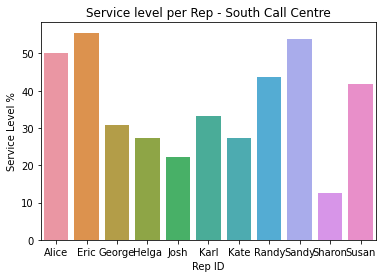

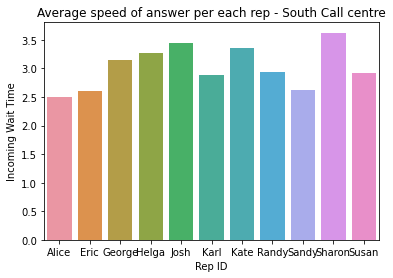

In [24]:
# Create visualization 2 here (For South Call centre)
# south_plt contains the data you need for the average speed of answer of each rep

south_plt = SouthCallCenter_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = SouthCallCenter_df[SouthCallCenter_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = SouthCallCenter_df[SouthCallCenter_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID") # [Aparna] so internally merge automatically 
#renames the common column name as _x and _ y i.e Calls is automatically renamed to Calls_x and Calls_y 

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

sns.barplot(x = service_level.index, y = service_level["Service Level %"])
plt.title("Service level per Rep - South Call Centre")
plt.show()
#[Aparna] - Below shows that Brent has a highest service level percentage of 75% which means of the total calls which brent 
# answere to , he replied to 75% of those calls in less than or equal to 2 seconds which means Brent is efficient in picking
# calls which signifies 75% of his customer doesn't have to wait for more than 2 seconds which helps in good customer service.
# Joes is least efficient in replying to the calls , he answers to only 20% of his customers in less than 2 seconds which
# signifies he makes 80% of the customers to wait for longer(more than 2 seconds) in call waiting

sns.barplot(x = south_plt["Rep ID"], y = south_plt["Incoming Wait Time"])
plt.title("Average speed of answer per each rep - South Call centre")
plt.show()
#This plot shows Brent is efficient as his Incoming wait time is 2 which is lesser that any other Rep, hence he is answering 
#to most of his customers in 2 seconds


[]

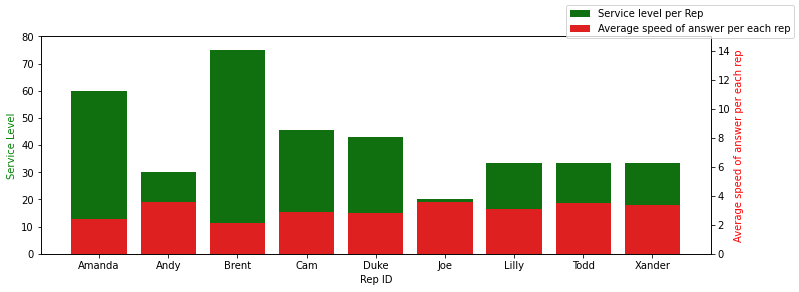

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# Create visualization 2 here (For North Call centre)
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = NorthCallCenter_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = NorthCallCenter_df[NorthCallCenter_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = NorthCallCenter_df[NorthCallCenter_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID") # [Aparna] so internally merge automatically 
#renames the common column name as _x and _ y i.e Calls is automatically renamed to Calls_x and Calls_y 

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

fig,fig1 = plt.subplots(figsize=(12,4))

fig1 = sns.barplot(x = service_level.index, y = service_level["Service Level %"], color='green',label = "Service level per Rep")
#fig2 = sns.barplot(x = north_plt["Rep ID"], y = north_plt["Incoming Wait Time"] , color='red', label = "Average speed of answer per each rep")

fig2 = fig1.twinx()
fig2.set_ylim([0,15])
fig1.set_ylim([0,80])
fig2 = sns.barplot(x = north_plt["Rep ID"], y = north_plt["Incoming Wait Time"] , color='red', label = "Average speed of answer per each rep")

fig1.set_ylabel('Service Level', color = 'g')
fig2.set_ylabel('Average speed of answer per each rep' , color = 'r' )
fig1.set_xlabel('Rep ID')
fig.legend(loc='upper right')
fig1.plot()
